In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

# Data

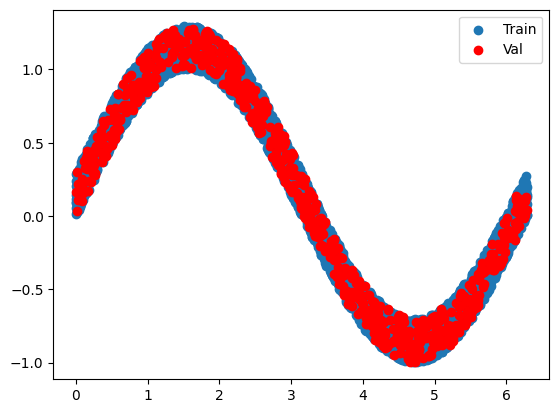

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, drop_last=True)

# Base

In [59]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

Epoch: 0 :::: Train loss 0.5269460678100586 :::: Val loss 0.2032797485589981 

Epoch: 49 :::: Train loss 0.007995620369911194 :::: Val loss 0.0090381084010005 

Epoch: 98 :::: Train loss 0.007829028181731701 :::: Val loss 0.007862795144319534 

Epoch: 0 :::: Train loss 0.47372856736183167 :::: Val loss 0.23630592226982117 

Epoch: 49 :::: Train loss 0.008919398300349712 :::: Val loss 0.00874556414783001 

Epoch: 98 :::: Train loss 0.00785396620631218 :::: Val loss 0.008805525489151478 

Epoch: 0 :::: Train loss 0.5632383227348328 :::: Val loss 0.301967591047287 

Epoch: 49 :::: Train loss 0.012189329601824284 :::: Val loss 0.01129735168069601 

Epoch: 98 :::: Train loss 0.009906684048473835 :::: Val loss 0.00941530242562294 

Epoch: 0 :::: Train loss 0.2548370063304901 :::: Val loss 0.16017092764377594 

Epoch: 49 :::: Train loss 0.00889414269477129 :::: Val loss 0.008690030314028263 

Epoch: 98 :::: Train loss 0.008085889741778374 :::: Val loss 0.0077910334803164005 



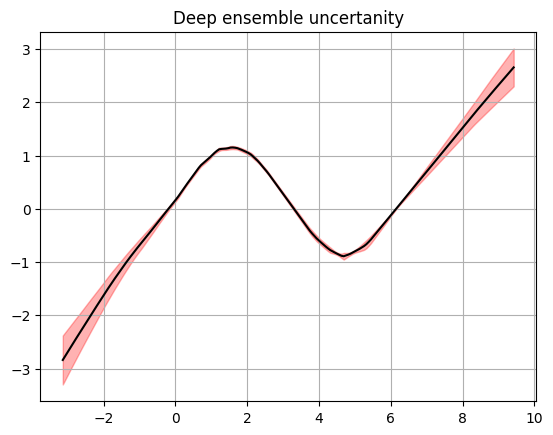

In [69]:
x_plot = torch.linspace(-np.pi,np.pi*3,200).view(-1, 1)
y_model_1 = base_model_1(x_plot.to('cuda'))
y_model_2 = base_model_2(x_plot.to('cuda'))
y_model_3 = base_model_3(x_plot.to('cuda'))
y_model_4 = base_model_4(x_plot.to('cuda'))
y_model = torch.cat((y_model_1, y_model_2, y_model_3, y_model_4),dim=1)
y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

x_plot = torch.flatten(x_plot)
ax = plt.axes()
plt.plot(x_plot, y_mean, c='black')
plt.fill_between(x_plot, y_mean-y_std, y_mean+y_std ,alpha=0.3,color='red')
plt.title("Deep ensemble uncertanity")
plt.grid()

# Masksemble

In [40]:
mask_model = MLP_Maksembles(2,6) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 0 :::: Train loss 0.3175986111164093 :::: Val loss 0.20266155898571014 

Epoch: 10 :::: Train loss 0.07115647941827774 :::: Val loss 0.0616786815226078 

Epoch: 20 :::: Train loss 0.03728429228067398 :::: Val loss 0.03312459960579872 

Epoch: 30 :::: Train loss 0.021586813032627106 :::: Val loss 0.019019968807697296 

Epoch: 40 :::: Train loss 0.014139560051262379 :::: Val loss 0.014112022705376148 

Epoch: 50 :::: Train loss 0.01132938452064991 :::: Val loss 0.012910977005958557 

Epoch: 60 :::: Train loss 0.009814104996621609 :::: Val loss 0.009870118461549282 

Epoch: 70 :::: Train loss 0.009055334143340588 :::: Val loss 0.00860216561704874 

Epoch: 80 :::: Train loss 0.008746997453272343 :::: Val loss 0.00854373537003994 

Epoch: 90 :::: Train loss 0.00850764662027359 :::: Val loss 0.00831312220543623 



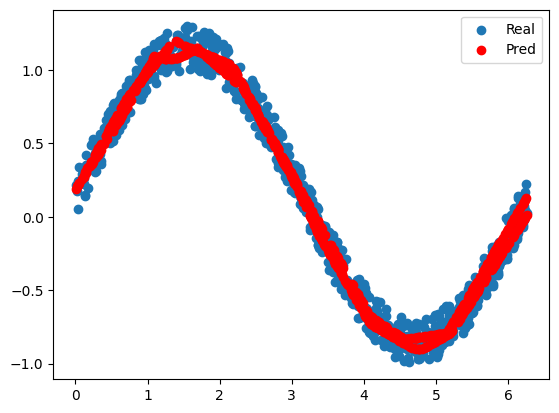

In [41]:
y_pred = mask_model(X_test.to('cuda'))
y_pred = torch.flatten(y_pred).cpu().detach().numpy()
y_real = torch.flatten(y_test)
plt.scatter(torch.flatten(X_test), y_real, label='Real')
plt.scatter(torch.flatten(X_test), y_pred, label='Pred', c='red')
plt.legend()

In [56]:
x_plot = torch.linspace(0,np.pi*2,200).view(-1, 1)
inputs = torch.Tensor(np.tile(x_plot, [400, 1])).to('cuda')
y_model_1 = mask_model(inputs)

In [44]:
np.tile(x_plot, [2, 1, 1]).shape

(2, 200, 1)

In [ ]:

y_model = torch.cat((y_model_1, y_model_2, y_model_3, y_model_4),dim=1)
y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

x_plot = torch.flatten(x_plot)
ax = plt.axes()
plt.plot(x_plot, y_mean, c='black')
plt.fill_between(x_plot, y_mean-y_std, y_mean+y_std ,alpha=0.3,color='red')
plt.title("Model uncertanity")
plt.grid()

# Dropout

In [5]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=15)

Epoch: 0 :::: Train loss 0.61424320936203 :::: Val loss 0.2803666889667511 

Epoch: 15 :::: Train loss 0.0650879368185997 :::: Val loss 0.035473719239234924 

Epoch: 30 :::: Train loss 0.04342453181743622 :::: Val loss 0.018917078152298927 

Epoch: 45 :::: Train loss 0.034545525908470154 :::: Val loss 0.012319888919591904 

Epoch: 60 :::: Train loss 0.03241884335875511 :::: Val loss 0.012984183616936207 

Epoch: 75 :::: Train loss 0.03251770883798599 :::: Val loss 0.012175634503364563 

Epoch: 90 :::: Train loss 0.033194493502378464 :::: Val loss 0.012753871269524097 



In [6]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

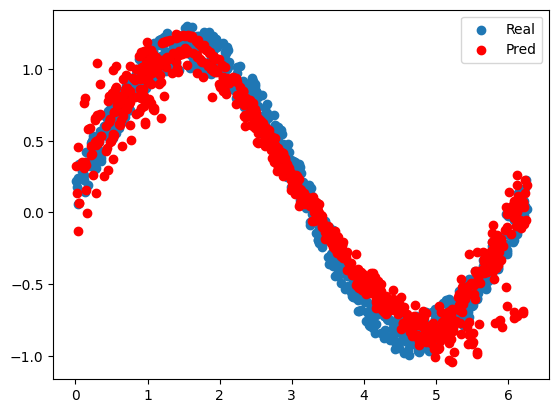

In [7]:
y_pred = drop_model(X_test.to('cuda'))
y_pred = torch.flatten(y_pred).cpu().detach().numpy()
y_real = torch.flatten(y_test)
plt.scatter(torch.flatten(X_test), y_real, label='Real')
plt.scatter(torch.flatten(X_test), y_pred, label='Pred', c='red')
plt.legend()

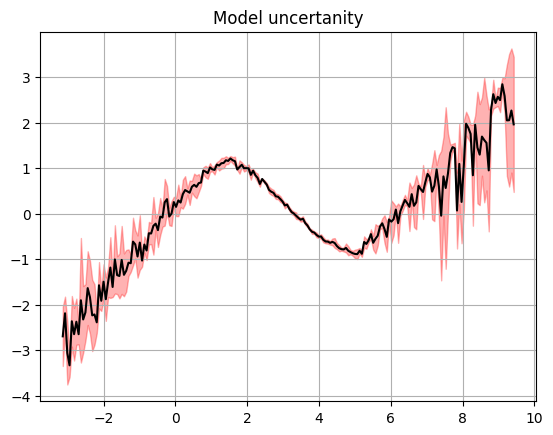

In [39]:
x_plot = torch.linspace(-np.pi,np.pi*3,200).view(-1, 1)
y_model_1 = drop_model(x_plot.to('cuda'))
y_model_2 = drop_model(x_plot.to('cuda'))
y_model_3 = drop_model(x_plot.to('cuda'))
y_model_4 = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model_1, y_model_2, y_model_3, y_model_4),dim=1)
y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

x_plot = torch.flatten(x_plot)
ax = plt.axes()
plt.plot(x_plot, y_mean, c='black')
plt.fill_between(x_plot, y_mean-y_std, y_mean+y_std ,alpha=0.3,color='red')
plt.title("Model uncertanity")
plt.grid()